<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/disinfectants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [307]:
df = pd.read_csv('./EXP0-7J.csv')
df

,Time,Reading_ID,Temp,Humidity,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,TARGET
0,12:43:55,2,34.4,45.0,441,274,826,374,830,373,272,441,0
1,12:44:0,3,34.4,44.9,468,285,1024,385,1024,382,283,468,0
2,12:44:5,4,34.3,45.4,536,296,1024,448,1024,446,294,537,0
3,12:44:10,5,34.3,46.1,567,280,1024,469,1024,465,278,567,0
4,12:44:16,6,34.2,46.2,577,264,1024,475,1024,474,260,577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,13:57:3,865,26.0,61.1,148,72,256,101,257,100,72,148,7
4395,13:57:8,866,26.1,61.1,164,72,257,101,258,101,72,163,7
4396,13:57:13,867,26.1,61.1,163,73,260,101,261,101,72,163,7
4397,13:57:18,868,26.1,61.1,151,72,260,101,261,101,72,151,7


In [308]:
labels = pd.read_excel('./dataset description.xlsx')
labels = labels['NAME'].values
labels,labels.shape

(array(['FRESH AIR', 'RAINBOW', 'PATANJALI GONYLE', 'LIZOL',
        'PURIC INSTA SAFE', 'PHENYLE NURSE', 'MOPZ NATURE FRESH',
        'MOPZ LIME FRESH'], dtype=object),
 (8,))

In [309]:
df.head()

,Time,Reading_ID,Temp,Humidity,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,TARGET
0,12:43:55,2,34.4,45.0,441,274,826,374,830,373,272,441,0
1,12:44:0,3,34.4,44.9,468,285,1024,385,1024,382,283,468,0
2,12:44:5,4,34.3,45.4,536,296,1024,448,1024,446,294,537,0
3,12:44:10,5,34.3,46.1,567,280,1024,469,1024,465,278,567,0
4,12:44:16,6,34.2,46.2,577,264,1024,475,1024,474,260,577,0


In [310]:
df.drop(['Time','Reading_ID'],inplace=True,axis=1)
columns = df.columns
columns

Index(['Temp', 'Humidity', 'MQ2', 'MQ3', 'MQ4', 'MQ7', 'MQ9', 'MQ135', 'MQ6',
       'MQ8', 'TARGET'],
      dtype='object')

In [311]:
# df = df.values
df_y = df['TARGET']
df_y
df_x = df.drop(['TARGET'],axis=1)
df_x
# df.drop(['TARGET'],inplace=True,axis=1)


,Temp,Humidity,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8
0,34.4,45.0,441,274,826,374,830,373,272,441
1,34.4,44.9,468,285,1024,385,1024,382,283,468
2,34.3,45.4,536,296,1024,448,1024,446,294,537
3,34.3,46.1,567,280,1024,469,1024,465,278,567
4,34.2,46.2,577,264,1024,475,1024,474,260,577
...,...,...,...,...,...,...,...,...,...,...
4394,26.0,61.1,148,72,256,101,257,100,72,148
4395,26.1,61.1,164,72,257,101,258,101,72,163
4396,26.1,61.1,163,73,260,101,261,101,72,163
4397,26.1,61.1,151,72,260,101,261,101,72,151


In [312]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_ohe  = ohe.fit_transform(df[['TARGET']]).toarray()
y_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [313]:
x_data = df_x.values
y_data = df_y.values
y_data_ohe = y_ohe
x_data,y_data,x_data.shape,y_data_ohe,y_data.shape



(array([[ 34.4,  45. , 441. , ..., 373. , 272. , 441. ],
        [ 34.4,  44.9, 468. , ..., 382. , 283. , 468. ],
        [ 34.3,  45.4, 536. , ..., 446. , 294. , 537. ],
        ...,
        [ 26.1,  61.1, 163. , ..., 101. ,  72. , 163. ],
        [ 26.1,  61.1, 151. , ..., 101. ,  72. , 151. ],
        [ 26.1,  61.1, 139. , ..., 101. ,  72. , 138. ]]),
 array([0, 0, 0, ..., 7, 7, 7]),
 (4399, 10),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 (4399,))

In [314]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_ohe, test_size=0.33, random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [315]:
x_train,x_test

(array([[-0.15925995,  0.30868432, -0.45009107, ..., -0.41744061,
         -0.93862933, -0.44803611],
        [ 0.0369247 , -0.01237375,  0.07168286, ..., -0.24435863,
         -0.51040699,  0.07339467],
        [-0.02847018, -0.11376051, -0.51147624, ..., -0.45205701,
         -0.89470909, -0.50938091],
        ...,
        [-0.02847018,  0.27488873,  0.04866342, ..., -0.27032093,
         -0.26884567,  0.05039037],
        [-0.22465483,  0.3424799 , -0.46543736, ..., -0.43474881,
         -0.90568915, -0.46337231],
        [-1.4671576 ,  1.66050775,  1.66002408, ...,  2.33456289,
          2.90439166,  1.66069131]]),
 array([[ 1.63589534e-01,  1.24900397e-02, -4.03460863e-03, ...,
         -2.49564247e-01, -4.89474078e-01, -2.36786949e-03],
        [ 3.55054125e-02, -7.96837235e-01, -5.37285728e-01, ...,
         -4.79142039e-01, -8.83036779e-01, -5.42862517e-01],
        [-1.56620770e-01,  3.92378352e-01, -4.62179936e-01, ...,
         -4.36627633e-01, -9.75639768e-01, -4.60286945e-

In [316]:
def scaler(arr):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  arr_ = sc.fit_transform(arr)
  # x_test = sc.fit_transform(x_test)
  return arr_


In [317]:
ann = tf.keras.models.Sequential()

In [318]:
# ann.add(tf.keras.layers.Dense)
ann.add(tf.keras.layers.Dense(units=10,input_shape=(10,),activation='relu'))


In [319]:
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='softmax'))

In [320]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [321]:
ann.compile(
    optimizer='Adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
ann.fit(x_train,y_train,epochs=10)
# SGD
# RMSprop
# Adam
# AdamW
# Adadelta
# Adagrad
# Adamax
# Adafactor
# Nadam
# Ftrl

Epoch 1/10
93/93 [==============================] - 1s 2ms/step - loss: 1.1991 - accuracy: 0.6390
Epoch 2/10
93/93 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.9040
Epoch 3/10
93/93 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9318
Epoch 4/10
93/93 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9542
Epoch 5/10
93/93 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9634
Epoch 6/10
93/93 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9667
Epoch 7/10
93/93 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9722
Epoch 8/10
93/93 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9779
Epoch 9/10
93/93 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9786
Epoch 10/10
93/93 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9820


In [331]:
y_pred = ann.predict(x_test)
y_pred[0]
y_pred = [np.argmax(i) for i in y_pred]
y_pred[0]

46/46 [==============================] - 0s 1ms/step


4

In [332]:
y_test = [np.argmax(i) for i in y_test]

y_test[0]

4

Text(95.72222222222221, 0.5, 'Truth')

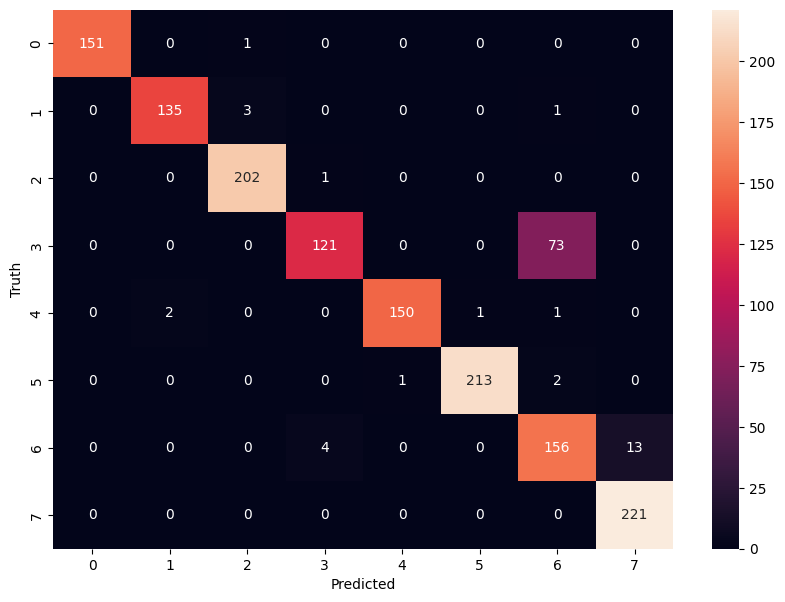

In [333]:
# confusion matrix
import matplotlib.pyplot as plt

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')